### About Dataset

#### Context
"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

#### Content
What's inside is more than just rows and columns. Make it easy for others to get started by describing how you acquired the data and what time period it represents, too.

Most important features that have an impact on Product taken: Designation, Passport, Tier City, Martial status, occupation
Customers with Designation as Executive should be the target customers for the company .Customers who have passport and are from tier 3 city and are single or unmarried, have large business such customers have higher chances of taking new package.
Customers monthly income in range of 15000- 25000, and age range 15-30, prefer 5 star properties also have higher chances of taking new package based on EDA.

#### Inspiration
We need to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

#### Tasks to Solve :
 - To predict which customer is more likely to purchase the newly introduced travel package
 - Which variables are most significant.
 - Which segment of customers should be targeted more.

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("susant4learning/holiday-package-purchase-prediction")

print("Path to dataset files:", path)

c:\Users\rushx\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 79.6k/79.6k [00:00<00:00, 2.23MB/s]

Extracting files...
Path to dataset files: C:\Users\rushx\.cache\kagglehub\datasets\susant4learning\holiday-package-purchase-prediction\versions\1


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('Travel.csv')

In [6]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

Data Cleaning-
1. Handling missing values
2. Handling Duplicates
3. Check data types
4. Understand the dataset

In [9]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [ ]:
df['Gender'].value_counts() #have to combine Female and Fe Male

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [ ]:
df['MaritalStatus'].value_counts() #have to combine single and unmmaried

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [18]:
df['Gender']=df['Gender'].replace('Fe Male', 'Female')
df['MaritalStatus']=df['MaritalStatus'].replace('Single','Unmarried')

In [19]:
df['Gender'].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [20]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64

In [21]:
## Check Misssing Values
##these are the features with nan value
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5), '% missing values')

Age 4.62357 % missing values
TypeofContact 0.51146 % missing values
DurationOfPitch 5.13502 % missing values
NumberOfFollowups 0.92062 % missing values
PreferredPropertyStar 0.53191 % missing values
NumberOfTrips 2.86416 % missing values
NumberOfChildrenVisiting 1.35025 % missing values
MonthlyIncome 4.76678 % missing values


In [23]:
# statistics on numerical columns (Null cols)
df[features_with_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


Imputing Null values
- Impute Median value for Age column
- Impute Mode for Type of Contract
- Impute Median for Duration of Pitch
- Impute Mode for NumberofFollowup as it is Discrete feature
- Impute Mode for PreferredPropertyStar
- Impute Median for NumberofTrips
- Impute Mode for NumberOfChildrenVisiting
- Impute Median for MonthlyIncome

In [38]:
#imputing null values
df.Age.fillna(df.Age.median(),inplace=True)
df.TypeofContact.fillna(df.TypeofContact.mode()[0],inplace=True)
df.DurationOfPitch.fillna(df.DurationOfPitch.median(),inplace=True)
df.NumberOfTrips.fillna(df.NumberOfTrips.median(),inplace=True)
df.MonthlyIncome.fillna(df.MonthlyIncome.median(),inplace=True)
df['NumberOfFollowups'] = df['NumberOfFollowups'].fillna(df['NumberOfFollowups'].mode()[0])
df['PreferredPropertyStar']=df['PreferredPropertyStar'].fillna(df['PreferredPropertyStar'].mode()[0])
df['NumberOfChildrenVisiting']=df['NumberOfChildrenVisiting'].fillna(df['NumberOfChildrenVisiting'].mode()[0])



C:\Users\rushx\AppData\Local\Temp\ipykernel_38560\2685361042.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Age.fillna(df.Age.median(),inplace=True)
C:\Users\rushx\AppData\Local\Temp\ipykernel_38560\2685361042.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

In [39]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [40]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [42]:
#dropping customer id

df.drop(columns=['CustomerID'],inplace=True)

In [43]:
df['Total_Visiting']=df['NumberOfPersonVisiting']+df['NumberOfChildrenVisiting']
df.drop(columns=['NumberOfPersonVisiting','NumberOfChildrenVisiting'],inplace=True)

In [44]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,Total_Visiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [45]:
df.shape

(4888, 18)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ProdTaken               4888 non-null   int64  
 1   Age                     4888 non-null   float64
 2   TypeofContact           4888 non-null   object 
 3   CityTier                4888 non-null   int64  
 4   DurationOfPitch         4888 non-null   float64
 5   Occupation              4888 non-null   object 
 6   Gender                  4888 non-null   object 
 7   NumberOfFollowups       4888 non-null   float64
 8   ProductPitched          4888 non-null   object 
 9   PreferredPropertyStar   4888 non-null   float64
 10  MaritalStatus           4888 non-null   object 
 11  NumberOfTrips           4888 non-null   float64
 12  Passport                4888 non-null   int64  
 13  PitchSatisfactionScore  4888 non-null   int64  
 14  OwnCar                  4888 non-null   

In [47]:
df['ProdTaken']

0       1
1       0
2       1
3       0
4       0
       ..
4883    1
4884    1
4885    1
4886    1
4887    1
Name: ProdTaken, Length: 4888, dtype: int64

In [68]:
#train test split

X=df.iloc[:,1:]


In [69]:
y=df['ProdTaken']

In [70]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [78]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3910, 17), (978, 17), (3910,), (978,))

In [79]:
#Creating column transformer( one hot encoding for object type andstandard scaler for numeric type)

cat_features=X.select_dtypes(include='object').columns
numeric_features=X.select_dtypes(exclude='object').columns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

ohe=OneHotEncoder(drop='first')
scaler=StandardScaler()

preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder",ohe,cat_features),
        ("StandardScaler",scaler,numeric_features)
    ]
)



In [80]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'Total_Visiting'],
      dtype='object'))])

In [81]:
X_train=preprocessor.fit_transform(X_train)
X_test=preprocessor.transform(X_test)

In [82]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-1.020350,1.284279,-0.725271,-0.127737,-0.632399,0.679690,0.782966,-0.382245,-0.774151
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.721400,0.690023,0.282777,-0.725271,1.511598,-0.632399,0.679690,0.782966,-0.459799,0.643615
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-1.020350,0.282777,1.771041,0.418708,-0.632399,0.679690,0.782966,-0.245196,-0.065268
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,-0.721400,-1.020350,1.284279,-0.725271,-0.127737,-0.632399,1.408395,-1.277194,0.213475,-0.065268
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,2.400396,-1.720227,-0.725271,1.511598,-0.632399,-0.049015,-1.277194,-0.024889,2.061382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-0.653841,1.284279,-0.725271,-0.674182,-0.632399,-1.506426,0.782966,-0.536973,0.643615
3906,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.455047,-0.898180,-0.718725,1.771041,-1.220627,-0.632399,1.408395,0.782966,1.529609,-0.065268
3907,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.455047,1.545210,0.282777,-0.725271,2.058043,-0.632399,-0.777720,0.782966,-0.360576,0.643615
3908,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.455047,1.789549,1.284279,-0.725271,-0.127737,-0.632399,-1.506426,0.782966,-0.252799,0.643615


Random Classifier Training

In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV

In [110]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score, precision_score, recall_score, f1_score,roc_auc_score,roc_curve

In [111]:
models={
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Logistic Regression":LogisticRegressionCV(cv=5)
}

for i in range(len(list(models))):
    #model training
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #train test model prediction
    y_hat_train=model.predict(X_train)
    y_hat_test=model.predict(X_test)

    print("_____________________________________________________________")
    print(list(models.keys())[i])
    print()

    #train predictions performance
    print(f"Accuracy score training {list(models.keys())[i]}: ",accuracy_score(y_train,y_hat_train))
    print()
    print(f"f1 score training {list(models.keys())[i]}: ",f1_score(y_train,y_hat_train, average="weighted"))
    print()
    print(f"Precision score training {list(models.keys())[i]}: ",precision_score(y_train,y_hat_train))
    print()
    print(f"Recall score training {list(models.keys())[i]}: ",recall_score(y_train,y_hat_train))
    print()
    print(f"roc_auc_score training {list(models.keys())[i]}: ",roc_auc_score(y_train,y_hat_train))
    print("_____________________________________________________________")


    #test predictions performance
    print(f"Accuracy score testing {list(models.keys())[i]}: ",accuracy_score(y_test,y_hat_test))
    print()
    print(f"f1 score testing {list(models.keys())[i]}: ",f1_score(y_test,y_hat_test, average="weighted"))
    print()
    print(f"Precision score testing {list(models.keys())[i]}: ",precision_score(y_test,y_hat_test))
    print()
    print(f"Recall score testing {list(models.keys())[i]}: ",recall_score(y_test,y_hat_test))
    print()
    print(f"roc_auc_score testing {list(models.keys())[i]}: ",roc_auc_score(y_test,y_hat_test))
    print("_____________________________________________________________")

_____________________________________________________________
Decision Tree

Accuracy score training Decision Tree:  1.0

f1 score training Decision Tree:  1.0

Precision score training Decision Tree:  1.0

Recall score training Decision Tree:  1.0

roc_auc_score training Decision Tree:  1.0
_____________________________________________________________
Accuracy score testing Decision Tree:  0.9192229038854806

f1 score testing Decision Tree:  0.9177733492526411

Precision score testing Decision Tree:  0.8218390804597702

Recall score testing Decision Tree:  0.7486910994764397

roc_auc_score testing Decision Tree:  0.8546505052655388
_____________________________________________________________
_____________________________________________________________
Random Forest

Accuracy score training Random Forest:  1.0

f1 score training Random Forest:  1.0

Precision score training Random Forest:  1.0

Recall score training Random Forest:  1.0

roc_auc_score training Random Forest:  1.0
____

Hyper parameter tuning

In [118]:
rf_params={
    'n_estimators':[100,200,300,400,500,600,700,800,900,1000],
    'max_features':[0.25, 0.5, 0.75, 1.0,'sqrt','auto'],
    'max_depth':[5,8,15, None, 10],
    'min_samples_split':[2,8,15,20]

}

In [119]:
models=[
    ("Random forest",RandomForestClassifier(),rf_params)
]

In [120]:
models

[('Random forest',
  RandomForestClassifier(),
  {'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
   'max_features': [0.25, 0.5, 0.75, 1.0, 'sqrt', 'auto'],
   'max_depth': [5, 8, 15, None, 10],
   'min_samples_split': [2, 8, 15, 20]})]

In [121]:
from sklearn.model_selection import RandomizedSearchCV

In [122]:
for name, model, params in models:
    model_param={}
    random=RandomizedSearchCV(estimator=model,cv=3, param_distributions=rf_params)
    random.fit(X_train,y_train)
    model_param[name]=random.best_params_

    for model_name in model_param:
        print(f"Best params for {model_name}")
        print(model_param[model_name])
    

c:\Users\rushx\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
6 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\rushx\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\rushx\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\rushx\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py",

Best params for Random forest
{'n_estimators': 900, 'min_samples_split': 2, 'max_features': 0.25, 'max_depth': 15}


In [128]:
models={
    "Random forest":RandomForestClassifier(n_estimators=900, min_samples_split=2,max_features=0.25,max_depth=15)
}

for i in range(len(list(models))):
    model=list(models.values())[i]

    #train
    model.fit(X_train,y_train)

     #train test model prediction
    y_hat_train=model.predict(X_train)
    y_hat_test=model.predict(X_test)

    print("_____________________________________________________________")
    print(list(models.keys())[i])
    print()

    #train predictions performance
    print(f"Accuracy score training {list(models.keys())[i]}: ",accuracy_score(y_train,y_hat_train))
    print()
    print(f"f1 score training {list(models.keys())[i]}: ",f1_score(y_train,y_hat_train, average="weighted"))
    print()
    print(f"Precision score training {list(models.keys())[i]}: ",precision_score(y_train,y_hat_train))
    print()
    print(f"Recall score training {list(models.keys())[i]}: ",recall_score(y_train,y_hat_train))
    print()
    print(f"roc_auc_score training {list(models.keys())[i]}: ",roc_auc_score(y_train,y_hat_train))
    print("_____________________________________________________________")


    #test predictions performance
    print(f"Accuracy score testing {list(models.keys())[i]}: ",accuracy_score(y_test,y_hat_test))
    print()
    print(f"f1 score testing {list(models.keys())[i]}: ",f1_score(y_test,y_hat_test, average="weighted"))
    print()
    print(f"Precision score testing {list(models.keys())[i]}: ",precision_score(y_test,y_hat_test))
    print()
    print(f"Recall score testing {list(models.keys())[i]}: ",recall_score(y_test,y_hat_test))
    print()
    print(f"roc_auc_score testing {list(models.keys())[i]}: ",roc_auc_score(y_test,y_hat_test))
    print("_____________________________________________________________")
    

_____________________________________________________________
Random forest

Accuracy score training Random forest:  0.9989769820971867

f1 score training Random forest:  0.9989758963204138

Precision score training Random forest:  1.0

Recall score training Random forest:  0.9945130315500685

roc_auc_score training Random forest:  0.9972565157750343
_____________________________________________________________
Accuracy score testing Random forest:  0.9304703476482618

f1 score testing Random forest:  0.9252689839320366

Precision score testing Random forest:  0.9694656488549618

Recall score testing Random forest:  0.6649214659685864

roc_auc_score testing Random forest:  0.8299194369233022
_____________________________________________________________


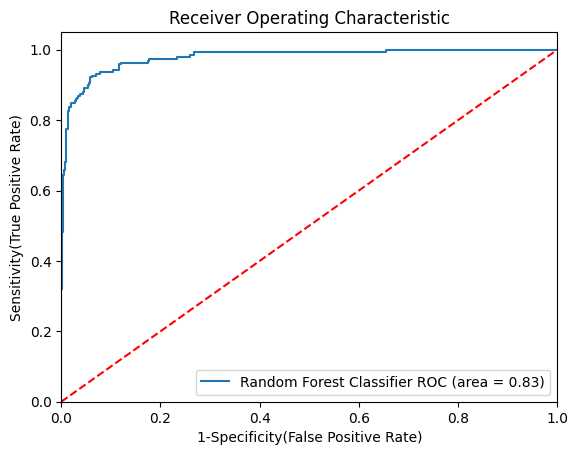

In [129]:
## Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'Random Forest Classifier',
    'model': RandomForestClassifier(n_estimators=900, min_samples_split=2,max_features=0.25,max_depth=15),
    'auc':  0.8299194369233022
},
    
]
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X_train, y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show() 